In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sn

In [2]:
# Load the train and test digits datasets in their respective variables
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
# Each sample is a 28x28 image
X_train[0].shape

(28, 28)

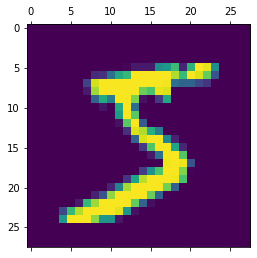

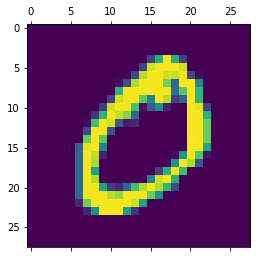

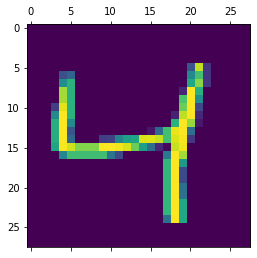

In [6]:
# Train test's first 3 images
for i in range(0, 3):
    plt.matshow(X_train[i])

In [7]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

### We're going to flatten our training dataset because we need to convert the 28x28 images into an 1D array.

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# Scaling our dataset in an attempt to increase accuracy. Current range is 0-255
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

## We start building our Neural Network

In [12]:
# Dense = All neurons in the 1st layer (input) are connected with all neurons in the 2nd layer (output).
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # (output, input, activation)
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4709 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2665 - accuracy: 0.9260


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2692 - accuracy: 0.9254


[0.26922065019607544, 0.9254000186920166]

In [15]:
y_predictions = model.predict(X_test_flattened)
y_predictions[1]  # Show the 10 outputs of our prediction for the first number (7)

array([4.4532081e-01, 9.4908774e-03, 9.9932146e-01, 3.8217473e-01,
       5.9333377e-10, 8.8981003e-01, 9.1766340e-01, 1.7576670e-12,
       1.4774606e-01, 3.8223060e-09], dtype=float32)

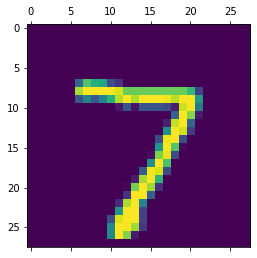

In [16]:
plt.matshow(X_test[0])

In [17]:
# Our prediction is the max value of the array above. Display it:
np.argmax(y_predictions[0])

7

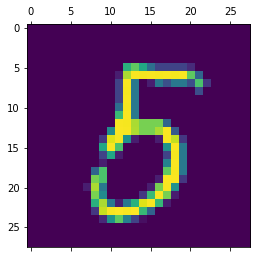

In [18]:
plt.matshow(X_test[45])

In [19]:
np.argmax(y_predictions[45])

5

## Confusion Matrix

In [20]:
y_predictions_labels = [np.argmax(i) for i in y_predictions]
y_predictions_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predictions_labels)

Text(69.0, 0.5, 'Truth')

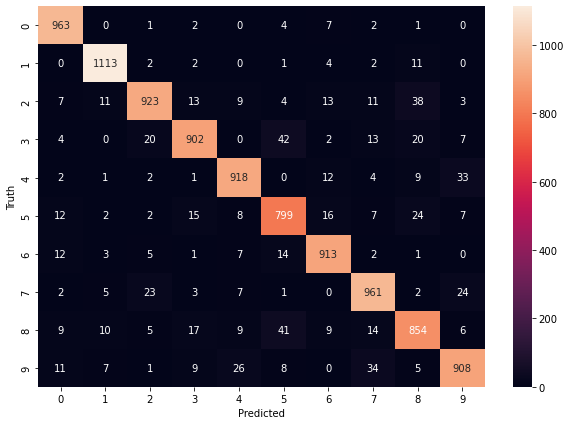

In [22]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding a hidden layer to improve performance

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # Middle (hidden) layer
    keras.layers.Dense(10, activation='sigmoid') # Output layer
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2760 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1276 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0892 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0548 - accuracy: 0.9832


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0740 - accuracy: 0.9772


[0.07398910075426102, 0.9771999716758728]

Text(69.0, 0.5, 'Truth')

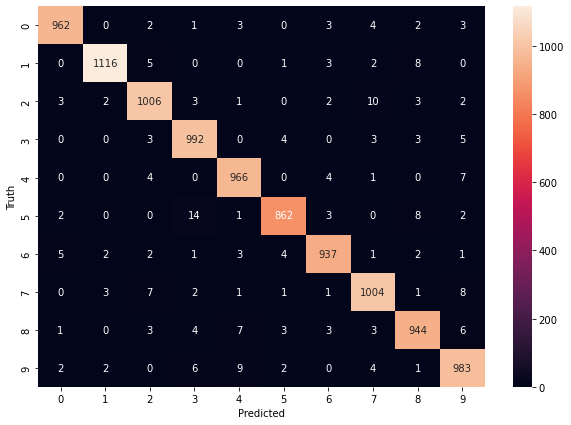

In [26]:
y_predictions = model.predict(X_test_flattened)
y_predictions_labels = [np.argmax(i) for i in y_predictions]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predictions_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Instead of creating variables for the flattened values, we can instead flatten the Train/Test sets via Keras.

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # Middle (hidden) layer
    keras.layers.Dense(10, activation='sigmoid') # Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2726 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1218 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0849 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0638 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0512 - accuracy: 0.9843


In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0816 - accuracy: 0.9748


[0.08164367079734802, 0.9747999906539917]

Text(69.0, 0.5, 'Truth')

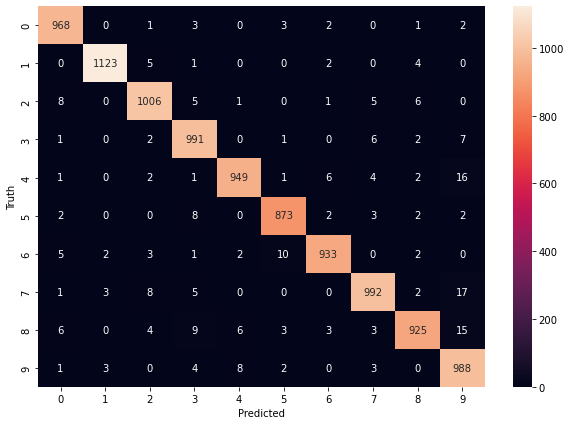

In [32]:
y_predictions = model.predict(X_test)
y_predictions_labels = [np.argmax(i) for i in y_predictions]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predictions_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')